# Lab 5: Tree Models

#### Implement a decision tree classifier using scikit-learn. Tune the hyperparameters of the decision tree. 
#### Visualize the constructed decision tree.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Implement a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Evaluate the decision tree model
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


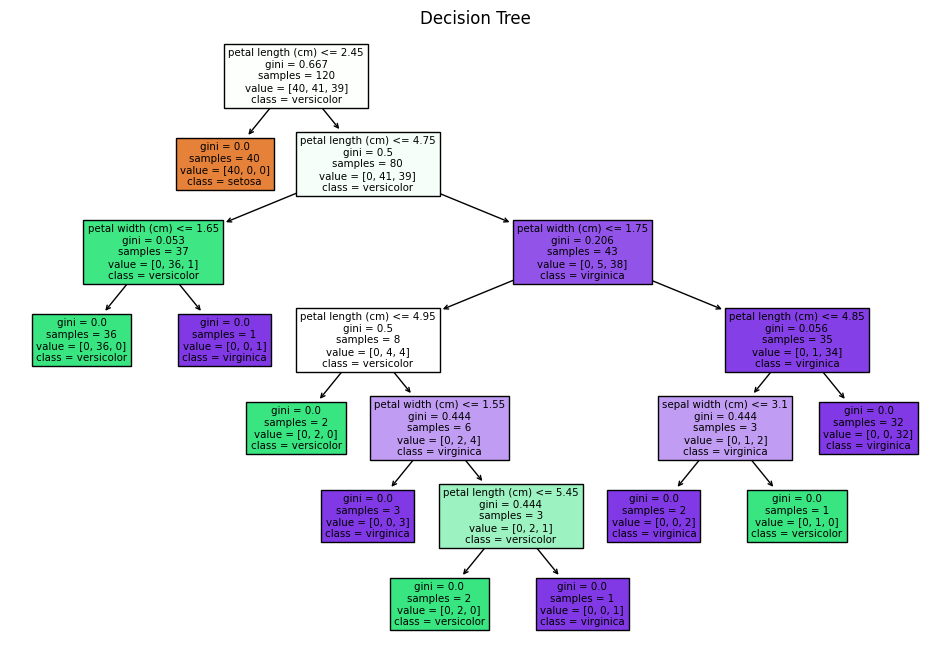

In [6]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()

In [7]:
# Tune the hyperparameters of the decision tree
# Grid search for optimal hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [8]:
# Evaluate the tuned decision tree model
best_tree_clf = grid_search.best_estimator_
y_pred_tuned = best_tree_clf.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Model): {accuracy_tuned:.2f}")

Accuracy (Tuned Model): 1.00


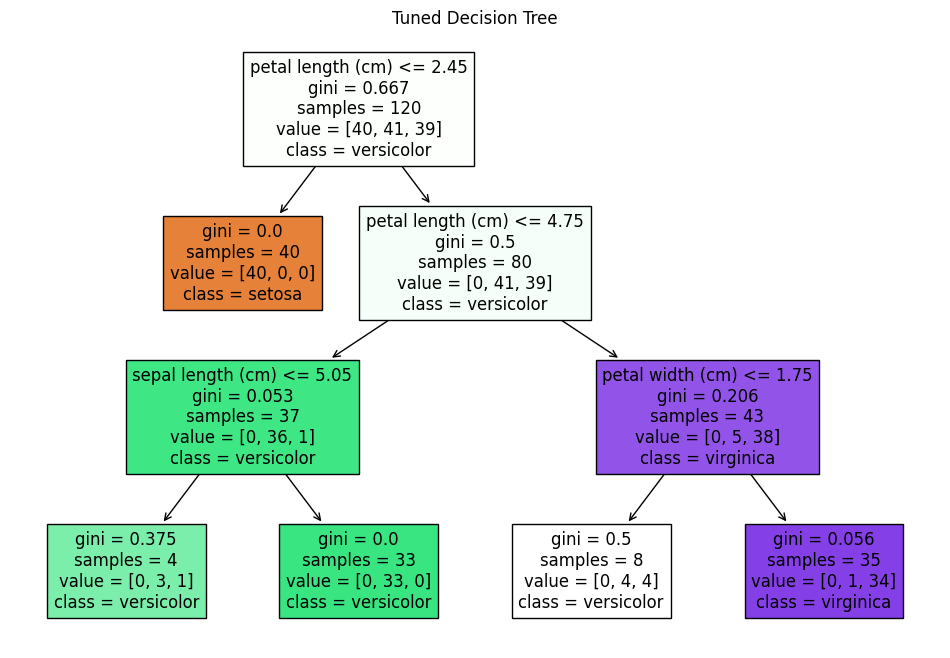

In [9]:
# Visualize the tuned decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Tuned Decision Tree")
plt.show()